# Practice Session: Random number and Monte Carlo integration

2025.04.21 (wed)

TA: Semin Cheon. KAIST Physics department. chsm0338@kaist.ac.kr

## Topic:

### Generating random numbers (Peudo Random Number Generator)

- Linear Congruential Generator (LCG)  
    - Simple case
    - Stable case
    - RANDU (Well-known example for showing PRNs have correaltions)
    - Visualizing correlation between the succesive random numbers

### Monte Carlo integration
- Simple examples
- Curse of dimensionality: Estimating Volume of a hypersphere in dimension d
- Effect of quality of random numbers 

## Generating random numbers (Peudo Random Number Generator)

### Linear Congruential Generator (LCG)  

#### x' = (ax + c) mod m
  Linear Congruential Generator is first invented by Lehmer and Derrick H in 1951 (published in 1958 by W. E. Thomson and A. Rotenberg). It generates a string of random integers (apparently), by iterating the same equation over and over. The program is completely deterministic. If you know the equation it uses and the values of the constant a, c, m and starting value x, then you know exactly the numbers the program will produce. Because of the modulo m, the maximum value is m-1. So we can get a random value r : 0 <= r < 1 (by dividing m). c and m are must coprime to each other, otherwise the process would generate only even or odd numbers. To make the maximum period; m-1, a-1 must can be divided by primes of m. If m can be divided by 4, a-1 also must be. The coordinates of the dots generated by this generator forms planes in a multi-dimensional space. ( https://en.wikipedia.org/wiki/Marsaglia%27s_theorem )

It is useful for only simple physics calculations.

#### Import libraries

In [471]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

#### Defining function

In [299]:
## Input
# seed : start number
# a : multiplier
# c : Shifter
# m : modulus
# N : Number of random numbers
# Normalize_flag : True or False

## Output
# Generated_numbers : 1D array of random generated numbers

def LCG( a, c, m, seed, N, Normalize_flag):

    Generated_numbers = np.zeros( [N] )
    for current_index in range(N):
        if Normalize_flag == True:
            Generated_numbers[current_index] = ((a*seed + c)%m)/m
        else:
            Generated_numbers[current_index] = (a*seed + c)%m
        seed = (a*seed + c)%m
        
    return Generated_numbers

#### Simple case: a = 89, c = 0, m = 101

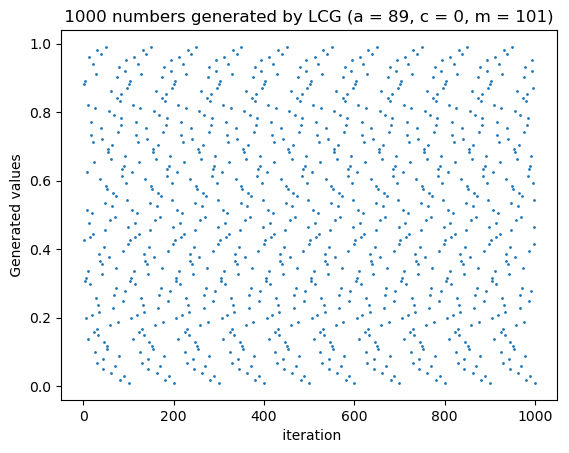

In [314]:
a = 89
c = 0
m = 101

x = 1 # seed
N = 1000 # number of random numbers
Generated_numbers_simple = LCG(a, c, m, x, N, 1)

marker_size = 1
plt.scatter( np.arange(1, N+1, 1), Generated_numbers_simple, marker_size )
plt.title( " {:.0f} numbers generated by LCG (a = {:.0f}, c = {:.0f}, m = {:.0f}) ".format(N, a, c, m) )
plt.xlabel(" iteration")
plt.ylabel(" Generated values ")
plt.show()
plt.close()

#### The stable condition: a = 1664525, c = 1013904223, m = 4294967296

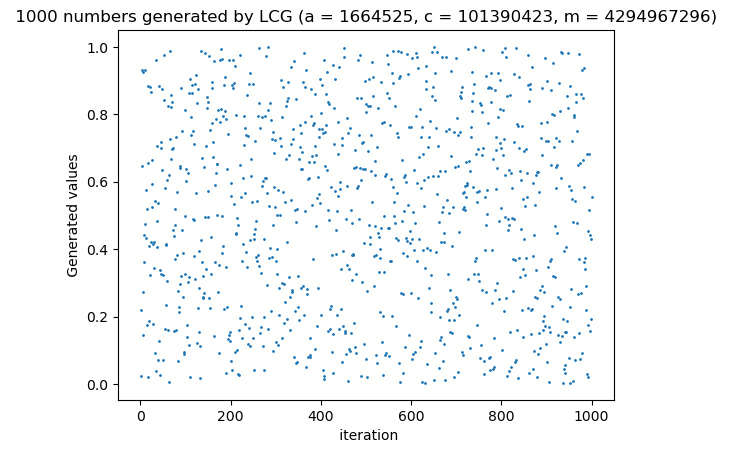

In [520]:
a = 1664525
c = 101390423
m = 4294967296

x = 1 # seed
N = 1000 # number of random numbers
Generated_numbers_stable = LCG(a, c, m, x, N, 1)

marker_size = 1
plt.scatter( np.arange(1, N+1, 1), Generated_numbers_stable, marker_size )
plt.title( " {:.0f} numbers generated by LCG (a = {:.0f}, c = {:.0f}, m = {:.0f}) ".format(N, a, c, m) )
plt.xlabel(" iteration")
plt.ylabel(" Generated values ")
plt.show()
plt.close()

#### RANDU ; a = 65539, c = 0, m = 2**31

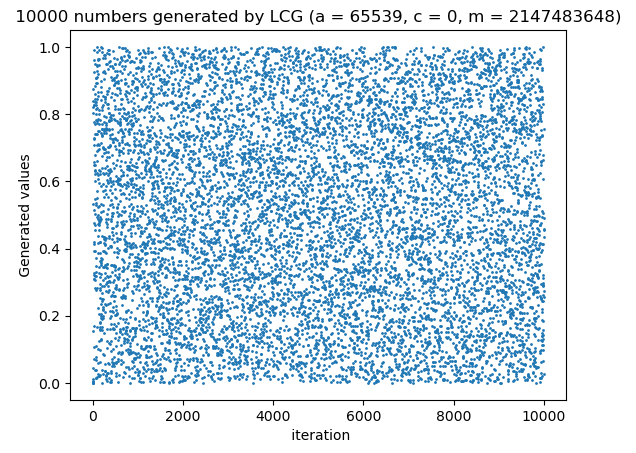

In [504]:
# Parameters for RANDU
a_RANDU = 65539
c_RANDU = 0
m_RANDU = 2**31

x = 1 # seed
N = 10000 # number of random numbers
Generated_numbers_RANDU = LCG(a_RANDU, c_RANDU, m_RANDU, x, N, 1)

marker_size = 1
plt.scatter( np.arange(1, N+1, 1), Generated_numbers_RANDU, marker_size )
plt.title( " {:.0f} numbers generated by LCG (a = {:.0f}, c = {:.0f}, m = {:.0f}) ".format(N, a, c, m) )
plt.xlabel(" iteration")
plt.ylabel(" Generated values ")
plt.show(  )
plt.close(  )

#### Visualizing correlation between the succesive random numbers

##### 1D to triplet
 1D: [ x1, x2, x3, x4, x5, x6, ..., xn ]  
 3D points [x,y,z]: [x1,x2,x3], [x2,x3,x4], [x3,x4,x5], ... [xn-2, xn-1, xn] (total we have n-2 points)  

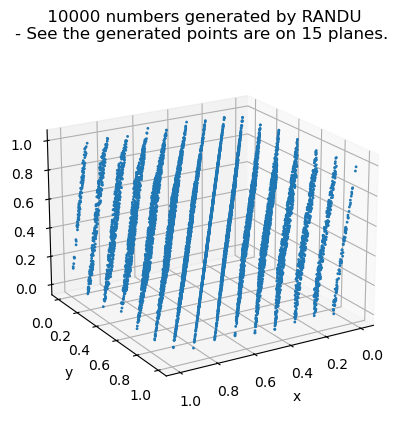

In [318]:
RANDU_3D_points = np.array([Generated_numbers_RANDU[i:i+3] for i in range(N - 2)])
    # RANDU_3D_points[:, 0] : x position ; Generated_numbers_RANDU[0:N-2]
    # RANDU_3D_points[:, 1] : y position ; Generated_numbers_RANDU[1:N-1]
    # RANDU_3D_points[:, 2] : z position ; Generated_numbers_RANDU[2:N]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RANDU_3D_points[:, 0], RANDU_3D_points[:, 1], RANDU_3D_points[:, 2],
           s = 1, alpha = 1)
ax.view_init( 20, 59)
ax.set_title( " {:.0f} numbers generated by RANDU \n- See the generated points are on 15 planes. ".format( N ) )
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
plt.close()

##### Mersenne Twister

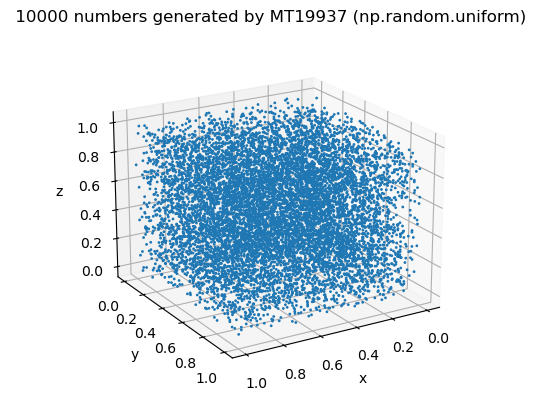

In [345]:
Generated_numbers_Mersenne = np.random.uniform(0, 1, N)

Mersenne_3D_points = np.zeros( [N-2,3])
Mersenne_3D_points[:, 0] = Generated_numbers_Mersenne[:N-2]
Mersenne_3D_points[:, 1] = Generated_numbers_Mersenne[1:N-1]
Mersenne_3D_points[:, 2] = Generated_numbers_Mersenne[2:N]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Mersenne_3D_points[:, 0], Mersenne_3D_points[:, 1], Mersenne_3D_points[:, 2],
           s = 1, alpha = 1)
ax.view_init( 20, 59)
ax.set_title( " {:.0f} numbers generated by MT19937 (np.random.uniform) ".format( N ) )
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
plt.close()

## Monte Carlo integration

### Simple example: Estimating area of a rectangle by throwing balls
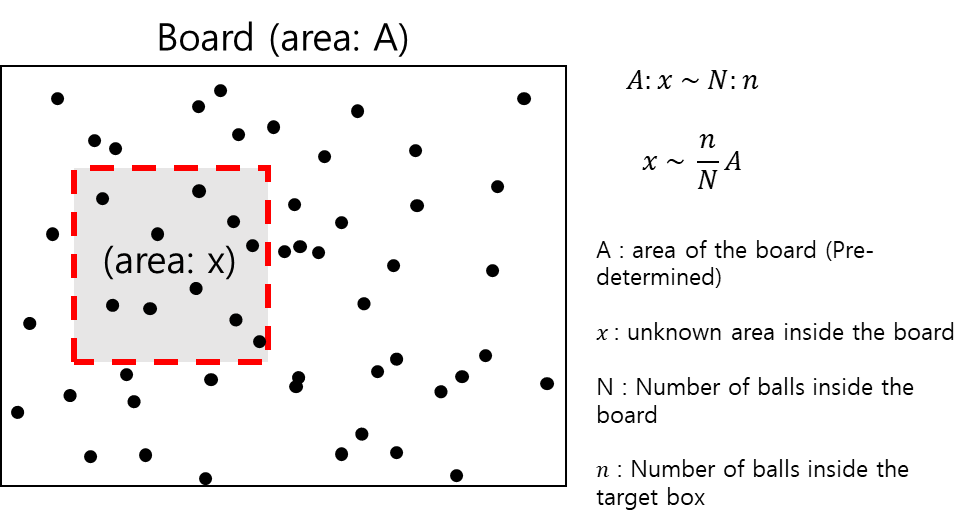

In [466]:
# Total area
Total_area_x = [0, 1.6] # [min x, max x]
Total_area_y = [0, 1] # [min y, max y]
Total_area = (Total_area_x[1]-Total_area_x[0])*(Total_area_y[1]-Total_area_y[0])

# Target rectangle
Target_area_x = [0.2, 0.8] # [min x, max x]
Target_area_y = [0.2, 0.8] # [min y, max y]
True_area = (Target_area_x[1]-Target_area_x[0])*(Target_area_y[1]-Target_area_y[0])

Number_of_balls = 4000

# Generate random (x, y) points
ball_position_x = np.random.uniform(Total_area_x[0], Total_area_x[1], Number_of_balls)
ball_position_y = np.random.uniform(Total_area_y[0], Total_area_y[1], Number_of_balls)

# 2 approaches: 1. double loop for logic
#               2. bollen mask           <- We will use the 2nd approach

Boolean_mask = (
                    (ball_position_x >= Target_area_x[0]) & (ball_position_x <= Target_area_x[1]) &
                    (ball_position_y >= Target_area_y[0]) & (ball_position_y <= Target_area_y[1])
                )

# Monte Carlo estimate
Balls_inside_the_target_box = np.sum(Boolean_mask) # number of balls inside the target box

estimated_area = (Balls_inside_the_target_box / Number_of_balls) * Total_area

# True area of target

print(f"Estimated area: {estimated_area:.4f}")
print(f"True area: {True_area:.4f}")
print(f"Relative error: {abs(estimated_area - True_area)/True_area:.2%}")

Estimated area: 0.3568
True area: 0.3600
Relative error: 0.89%


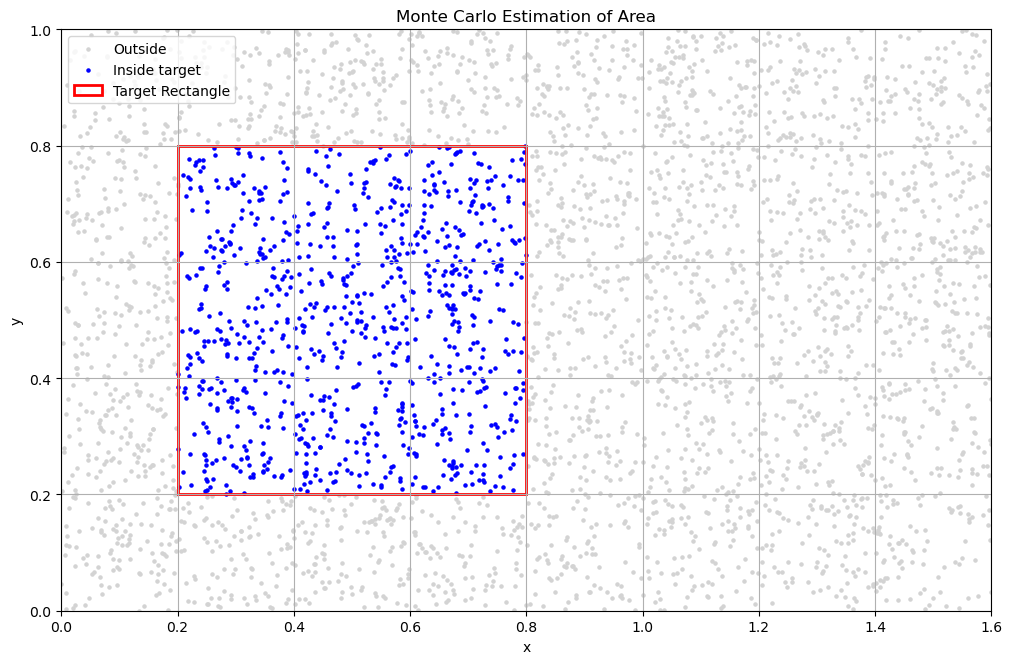

In [467]:
# Plot the points and rectangles
plt.figure(figsize=(12, 12))

# Points outside the target
plt.scatter(ball_position_x[~Boolean_mask], ball_position_y[~Boolean_mask], s=5, color='lightgray', label='Outside')

# Points inside the target
plt.scatter(ball_position_x[Boolean_mask], ball_position_y[Boolean_mask], s=5, color='blue', label='Inside target')

# Draw the red target rectangle
plt.gca().add_patch(plt.Rectangle(
    (Target_area_x[0], Target_area_y[0]),
    Target_area_x[1] - Target_area_x[0],
    Target_area_y[1] - Target_area_y[0],
    edgecolor='red',
    facecolor='none',
    linewidth=2,
    label='Target Rectangle'
))

plt.title("Monte Carlo Estimation of Area")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(Total_area_x)
plt.ylim(Total_area_y)
plt.gca().set_aspect('equal')
plt.legend()
plt.grid(True)
plt.show()

### Curse of dimensionality: Estimating Volume of a hypersphere in dimension d

Let's think about a unit hypersphere in $R^{d}$:  
all points (x1, x2, ..., xd) such that $\sum \limits _{i=1} ^{d} x^{2} _{i} \le 1 $

The hypersphere is bounded in the hypercube:  
$[-1,1] ^{d} \Rightarrow volume = 2^{d} $  

Monte Carlo approach: We randomly sample points in the hypercube and count how many fall inside the hypersphere like:  
$ V_{d} \sim N_{in}/{N} \cdot 2^{d}$

https://en.wikipedia.org/wiki/Curse_of_dimensionality

In [493]:
def estimate_unit_hypersphere_volume(r, d, N):
    points = np.random.uniform(-r, r, size=(N, d))
    distances = np.linalg.norm(points, axis=1) # Euclidiean normalization. It calculates distance from the origin
    inside = distances <= r
    volume = (np.sum(inside) / N) * ((2*r)**d)
    return volume
    
# Exact volumes for small d using gamma function
def exact_volume(d):
    return (np.pi ** (d / 2)*r**d) / gamma(d / 2 + 1)

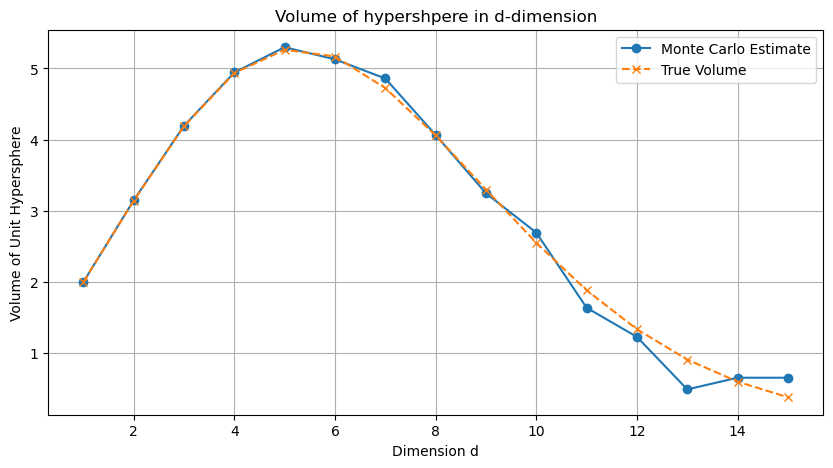

In [537]:
dims = range(1, 16) # 1D to 15 D
N = 10**5  # number of samples
r = 1 # radius of the hypersphere

volumes = [estimate_unit_hypersphere_volume(r, d, N) for d in dims]

true_volumes = [exact_volume(d) for d in dims]

plt.figure(figsize=(10, 5))
plt.plot(dims, volumes, label='Monte Carlo Estimate', marker='o')
plt.plot(dims, true_volumes, label='True Volume', linestyle='--', marker='x')
plt.xlabel("Dimension d")
plt.ylabel("Volume of Unit Hypersphere")
plt.title("Volume of hypershpere in d-dimension")
plt.legend()
plt.grid(True)
plt.show()

### Effect of quality of random numbers

In [543]:
def estimate_unit_hypersphere_volume_RANDU(r, d, N):

    Generated_numbers_RANDU = 2*r*LCG(65539, 0, 2**31, 1, N+d-1, 1) - r # random number in (-r, r)
    RANDU_dD_points = np.array([Generated_numbers_RANDU[i:i+d] for i in range(N - d + 1)])
    
    distances = np.linalg.norm(RANDU_dD_points, axis=1) # Euclidiean normalization. It calculates distance from the origin
    inside = distances <= r
    volume = (np.sum(inside) / N) * ((2*r)**d)
    return volume

def estimate_unit_hypersphere_volume_really_poor_generator(r, d, N):

    Generated_numbers_poor = 2*r*LCG(89, 0, 101, 1, N+d-1, 1) - r # random number in (-r, r)
    Poor_dD_points = np.array([Generated_numbers_poor[i:i+d] for i in range(N - d + 1)])
    
    distances = np.linalg.norm(Poor_dD_points, axis=1) # Euclidiean normalization. It calculates distance from the origin
    inside = distances <= r
    volume = (np.sum(inside) / N) * ((2*r)**d)
    return volume

def estimate_unit_hypersphere_volume_stable_LCG(r, d, N):

    Generated_numbers_poor = 2*r*LCG(1664525, 101390423, 4294967296, 1, N+d-1, 1) - r # random number in (-r, r)
    Poor_dD_points = np.array([Generated_numbers_poor[i:i+d] for i in range(N - d + 1)])
    
    distances = np.linalg.norm(Poor_dD_points, axis=1) # Euclidiean normalization. It calculates distance from the origin
    inside = distances <= r
    volume = (np.sum(inside) / N) * ((2*r)**d)
    return volume

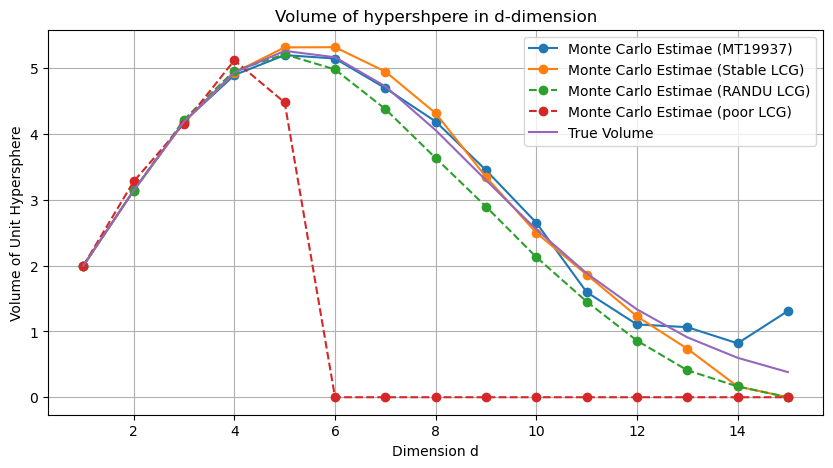

In [544]:
volumes = [estimate_unit_hypersphere_volume(r, d, N) for d in dims]
volumes_stable_LCG = [estimate_unit_hypersphere_volume_stable_LCG(r, d, N) for d in dims]
volumes_RANDU = [estimate_unit_hypersphere_volume_RANDU(r, d, N) for d in dims]
volumes_poor = [estimate_unit_hypersphere_volume_really_poor_generator(r, d, N) for d in dims]

true_volumes = [exact_volume(d) for d in dims]

plt.figure(figsize=(10, 5))
plt.plot(dims, volumes, label='Monte Carlo Estimae (MT19937)', marker='o')
plt.plot(dims, volumes_stable_LCG, label='Monte Carlo Estimae (Stable LCG)', marker='o')
plt.plot(dims, volumes_RANDU, label='Monte Carlo Estimae (RANDU LCG)', linestyle='--', marker='o')
plt.plot(dims, volumes_poor, label='Monte Carlo Estimae (poor LCG)', linestyle='--', marker='o')
plt.plot(dims, true_volumes, label='True Volume', linestyle='-')
plt.xlabel("Dimension d")
plt.ylabel("Volume of Unit Hypersphere")
plt.title("Volume of hypershpere in d-dimension")
plt.legend()
plt.grid(True)
plt.show()